In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [21]:
#Reading the provided dataset

df = pd.read_csv ('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [23]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [24]:
# Statistical View 

df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [25]:
#Checking null values

df.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [ ]:
# As displayed above, there are no null values in the provided dataset

In [26]:
from sklearn.model_selection import train_test_split

In [59]:
train, test = train_test_split(df,test_size=0.30,random_state=42)

In [60]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,...,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.00000,13814.000000,13814.000000,13814.000000
mean,97.727668,3.806283,21.686763,40.266932,20.340520,40.434603,22.266034,39.248732,20.848127,39.046753,...,19.487097,41.572240,7.407235,755.540437,79.822901,4.033814,38.32902,3.770230,25.042683,25.042683
std,102.960299,7.976589,1.609259,3.967834,2.194564,4.072087,2.004065,3.251320,2.045198,4.331206,...,2.019205,4.154877,5.323896,7.366515,14.905399,2.441628,11.84537,4.201109,14.511587,14.511587
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.596667,17.200000,28.766667,15.100000,28.424286,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.00000,-6.600000,0.013539,0.013539
25%,50.000000,0.000000,20.760000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.575250,...,18.000000,38.530000,3.633333,750.916667,70.333333,2.000000,29.00000,0.900000,12.471474,12.471474
50%,60.000000,0.000000,21.600000,39.663333,20.000000,40.500000,22.100000,38.560000,20.600000,38.463333,...,19.390000,40.930000,6.900000,756.100000,84.000000,3.666667,40.00000,3.450000,24.970778,24.970778
75%,100.000000,0.000000,22.600000,43.085000,21.500000,43.290000,23.290000,41.766667,22.100000,42.163333,...,20.600000,44.363333,10.400000,760.950000,91.666667,5.500000,40.00000,6.600000,37.663967,37.663967
max,1080.000000,70.000000,26.260000,57.423333,29.856667,54.766667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.283333,100.000000,14.000000,66.00000,15.400000,49.996530,49.996530


In [ ]:
#This is not a time series problem, so ignoring the date column is recommended.

In [61]:
# Dividing the columns with respect to the category they fall into

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [62]:
# Seperating dependent variables from the independent variable 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_var = train[col_target]

In [63]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,...,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.000000,13814.00000,13814.000000,13814.000000,13814.000000
mean,21.686763,20.340520,22.266034,20.848127,19.594472,7.898266,20.267629,22.029959,19.487097,40.266932,...,41.572240,7.407235,3.770230,79.822901,755.540437,4.033814,38.32902,3.806283,25.042683,25.042683
std,1.609259,2.194564,2.004065,2.045198,1.847289,6.097290,2.113199,1.957590,2.019205,3.967834,...,4.154877,5.323896,4.201109,14.905399,7.366515,2.441628,11.84537,7.976589,14.511587,14.511587
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.030000,15.390000,16.306667,14.890000,27.023333,...,29.166667,-5.000000,-6.600000,24.000000,729.300000,0.000000,1.00000,0.000000,0.013539,0.013539
25%,20.760000,18.790000,20.790000,19.533333,18.290000,3.590000,18.700000,20.790000,18.000000,37.363333,...,38.530000,3.633333,0.900000,70.333333,750.916667,2.000000,29.00000,0.000000,12.471474,12.471474
50%,21.600000,20.000000,22.100000,20.600000,19.390000,7.300000,20.033333,22.120000,19.390000,39.663333,...,40.930000,6.900000,3.450000,84.000000,756.100000,3.666667,40.00000,0.000000,24.970778,24.970778
75%,22.600000,21.500000,23.290000,22.100000,20.600000,11.245000,21.600000,23.390000,20.600000,43.085000,...,44.363333,10.400000,6.600000,91.666667,760.950000,5.500000,40.00000,0.000000,37.663967,37.663967
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,25.963333,27.230000,24.500000,57.423333,...,53.326667,26.100000,15.400000,100.000000,772.283333,14.000000,66.00000,70.000000,49.996530,49.996530


In [64]:
# Ideally, light should have an insignificant impact of temp and humidity conditions. 
# To confirm the above point, it is pertinent to check the distribution of values within the lights

feature_vars.lights.value_counts()

0     10685
10     1543
20     1121
30      399
40       57
50        7
70        1
60        1
Name: lights, dtype: int64

In [65]:
target_var.describe()

,Appliances
count,13814.000000
mean,97.727668
std,102.960299
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


In [50]:
# With 10685 zero enteries (light column) in 13814 rows, the light column will not add no value to the model
# So, dropping the light column is encouraged 

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
# Dropping the lights column

_ = feature_vars.drop(['lights'], axis=1 , inplace= True)

In [68]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9129,21.5,17.79,21.700000,20.39,19.6,0.133333,20.79,22.10,19.463333,35.626667,...,39.29,38.260000,0.250000,-2.350000,83.000000,766.400000,2.0,65.0,36.226675,36.226675
2453,19.5,18.70,19.823333,18.10,17.2,3.390000,18.89,18.79,17.200000,44.560000,...,45.20,46.163333,3.166667,0.966667,85.333333,765.266667,2.0,40.0,43.199767,43.199767


<AxesSubplot:xlabel='Appliance consumption in Wh', ylabel='Frequency'>

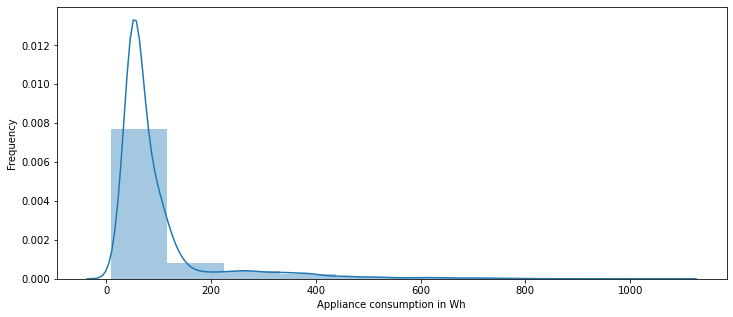

In [69]:
# Distribution of values within Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_var , bins=10 )

array([[<AxesSubplot:title={'center':'T1'}>,
        <AxesSubplot:title={'center':'T2'}>,
        <AxesSubplot:title={'center':'T3'}>,
        <AxesSubplot:title={'center':'T4'}>,
        <AxesSubplot:title={'center':'T5'}>],
       [<AxesSubplot:title={'center':'T6'}>,
        <AxesSubplot:title={'center':'T7'}>,
        <AxesSubplot:title={'center':'T8'}>,
        <AxesSubplot:title={'center':'T9'}>,
        <AxesSubplot:title={'center':'RH_1'}>],
       [<AxesSubplot:title={'center':'RH_2'}>,
        <AxesSubplot:title={'center':'RH_3'}>,
        <AxesSubplot:title={'center':'RH_4'}>,
        <AxesSubplot:title={'center':'RH_5'}>,
        <AxesSubplot:title={'center':'RH_6'}>],
       [<AxesSubplot:title={'center':'RH_7'}>,
        <AxesSubplot:title={'center':'RH_8'}>,
        <AxesSubplot:title={'center':'RH_9'}>,
        <AxesSubplot:title={'center':'T_out'}>,
        <AxesSubplot:title={'center':'Tdewpoint'}>],
       [<AxesSubplot:title={'center':'RH_out'}>,
        <AxesSubplo

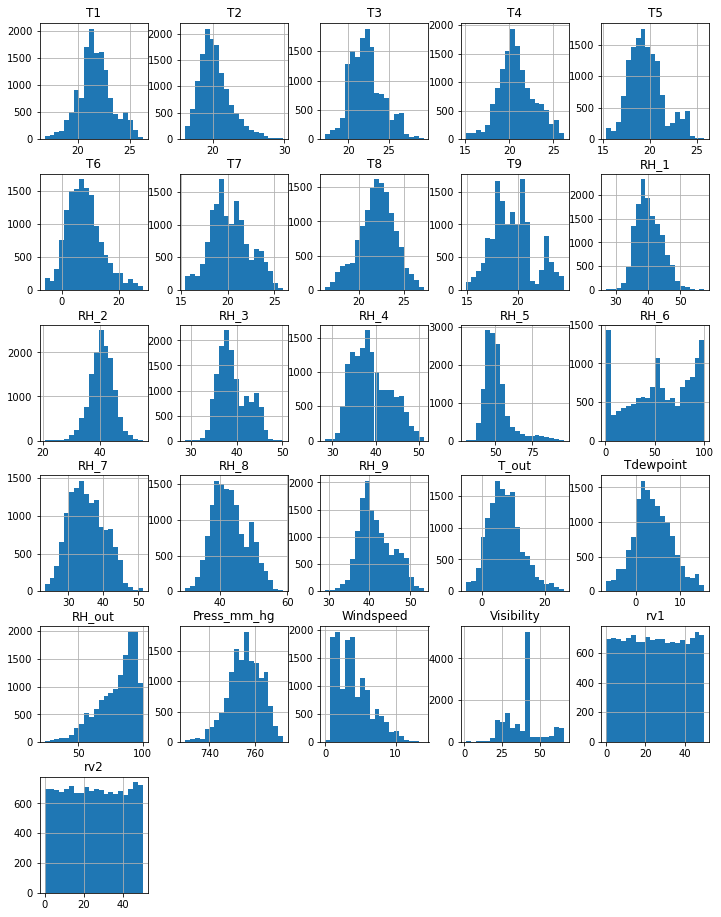

In [70]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16))

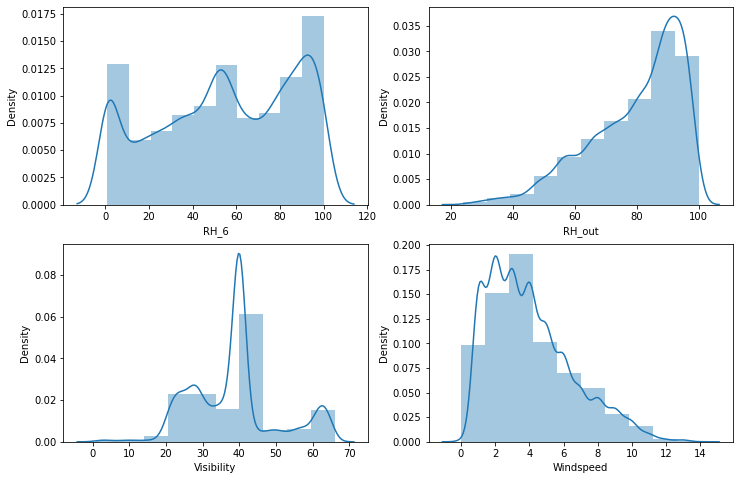

In [71]:
# displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

In [72]:
#Appliance column range with energy consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_var[target_var <= 200].count()) / (len(target_var)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.364847
dtype: float64


In [73]:
from sklearn.model_selection import train_test_split

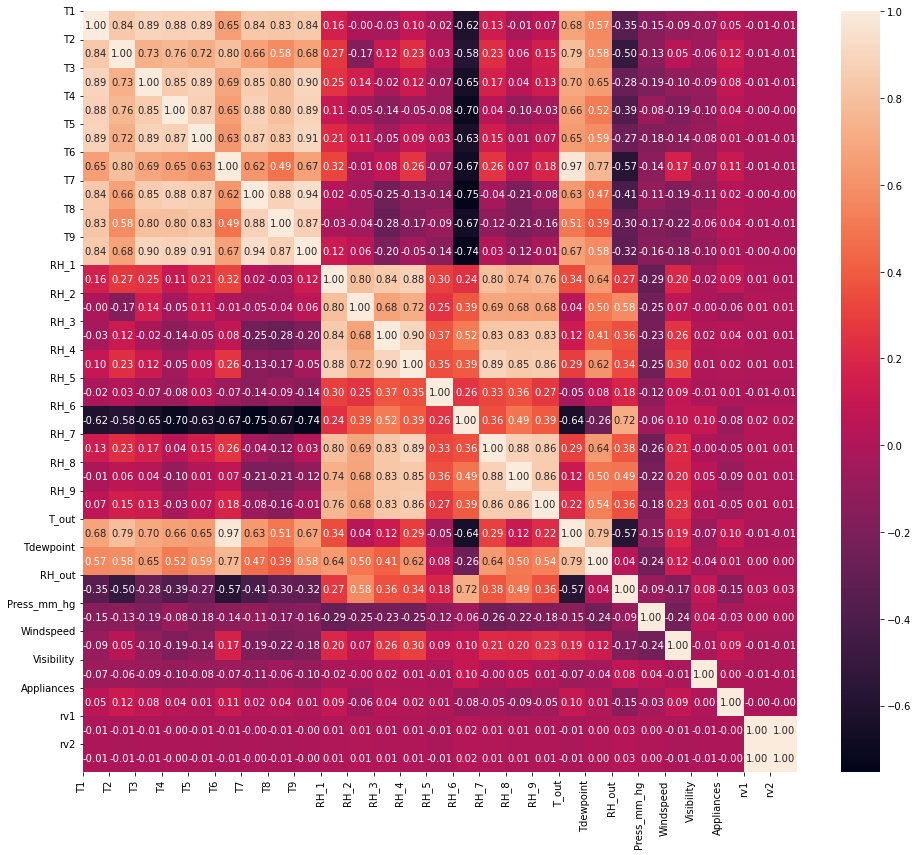

In [75]:
# Use the weather , temperature , applainces and random column to observe the correlation
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [76]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1    rv2          1.000000
T6     T_out        0.974943
T7     T9           0.944628
T5     T9           0.909808
T3     T9           0.902979
RH_3   RH_4         0.898992
RH_4   RH_7         0.894387
T1     T3           0.892725
T4     T9           0.890205
T3     T5           0.888264
T1     T5           0.885784
RH_7   RH_8         0.883225
T7     T8           0.882707
RH_1   RH_4         0.879513
T4     T7           0.878379
T1     T4           0.877687
T4     T5           0.872222
T8     T9           0.870056
T5     T7           0.869539
RH_7   RH_9         0.857925
RH_4   RH_9         0.855694
RH_8   RH_9         0.855694
T3     T4           0.853996
       T7           0.849470
RH_4   RH_8         0.847380
T1     T9           0.844488
RH_1   RH_3         0.844073
T1     T7           0.838649
       T2           0.836241
RH_3   RH_9         0.834217
       RH_7         0.833430
       RH_8         0.830490
T1     T8           0.827966
T5     T8        

In [160]:
# From the correlation plots generated:
# All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances
# T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation. Hence, T6 & T9 can be removed from training set
# Weather variable types - Visibility, Tdewpoint, Press_mm_hg have low correlation values
#For Humidity, there are no relevant high correlation cases (> 0.9) for humidity sensors.
# Random variables are insignificant

In [77]:
from sklearn.model_selection import train_test_split
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_var.columns]

In [79]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_var.columns]

In [80]:
#Removing columns - rv1,"rv2,"Visibility,T6 & T9
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [81]:
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [82]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [83]:
#Firstly, normalise the dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [84]:
# Including Appliances column to the test and training set

train = train[list(train_X.columns.values) + col_target]

test = test[list(test_X.columns.values) + col_target]

In [85]:
# Create dummy test and training set to hold scaled values

scaler_train = pd.DataFrame(columns=train.columns , index=train.index)

scaler_train[scaler_train.columns] = scaler.fit_transform(train)

scaler_test= pd.DataFrame(columns=test.columns , index=test.index)

scaler_test[scaler_test.columns] = scaler.fit_transform(test)

In [87]:
scaler_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9129,0.497360,0.122850,0.373878,0.476577,0.408027,0.510719,0.530363,0.283004,0.585114,0.303474,...,0.484901,0.141292,0.332077,0.376380,0.168810,0.193182,0.776316,0.863125,0.142857,0.037383
2453,0.286167,0.188999,0.217957,0.270270,0.178691,0.331021,0.227342,0.576864,0.693396,0.735317,...,0.866532,0.564102,0.534613,0.703504,0.262594,0.343939,0.807018,0.836758,0.142857,0.018692
9152,0.422386,0.057427,0.373878,0.414414,0.378404,0.472888,0.496491,0.275548,0.627256,0.338059,...,0.615369,0.159087,0.324195,0.409803,0.110397,0.159091,0.859649,0.853819,0.095238,0.028037
12694,0.560718,0.280834,0.514290,0.540541,0.509317,0.561791,0.740006,0.534101,0.728807,0.515189,...,0.259050,0.369495,0.316450,0.340784,0.444802,0.560606,0.750000,0.559907,0.119048,0.102804
16952,0.835269,1.000000,0.745383,0.900901,0.748845,0.814313,0.744034,0.504496,0.327578,0.459106,...,0.000000,0.634356,0.529678,0.633278,0.849946,0.790909,0.355263,0.530438,0.142857,0.037383


In [86]:
scaler_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
8980,0.432946,0.121256,0.257531,0.421992,0.312320,0.585297,0.618615,0.226056,0.525822,0.344068,...,0.635165,0.371040,0.341898,0.413025,0.217204,0.295988,0.844444,0.920869,0.179487,0.033708
2754,0.538543,0.379109,0.369488,0.492022,0.223559,0.141376,0.392245,0.715999,0.700066,0.970847,...,0.971587,0.572518,0.616041,0.630252,0.247312,0.350492,0.866667,0.588053,0.230769,0.089888
9132,0.485744,0.112004,0.372267,0.469987,0.408566,0.508954,0.529182,0.228825,0.564252,0.257627,...,0.504853,0.145035,0.337659,0.381933,0.166667,0.186980,0.773333,0.858029,0.153846,0.044944
14359,0.485744,0.569028,0.402826,0.660155,0.411774,0.439208,0.446097,0.381989,0.404255,0.345763,...,0.094001,0.254965,0.283760,0.393277,0.445699,0.464799,0.611111,0.895268,0.397436,0.044944
8875,0.335093,0.026540,0.233361,0.376714,0.243985,0.471254,0.529182,0.218490,0.552910,0.318644,...,0.710111,0.385106,0.336373,0.483193,0.145161,0.230129,0.911111,0.938324,0.307692,0.067416


In [88]:
# Removing Appliances column from traininig set

train_X =  scaler_train.drop(['Appliances'] , axis=1)
train_y = scaler_train['Appliances']

test_X =  scaler_test.drop(['Appliances'] , axis=1)
test_y = scaler_test['Appliances']

In [89]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9129,0.497360,0.122850,0.373878,0.476577,0.408027,0.510719,0.530363,0.283004,0.585114,0.303474,...,0.155065,0.484901,0.141292,0.332077,0.376380,0.168810,0.193182,0.776316,0.863125,0.142857
2453,0.286167,0.188999,0.217957,0.270270,0.178691,0.331021,0.227342,0.576864,0.693396,0.735317,...,0.330033,0.866532,0.564102,0.534613,0.703504,0.262594,0.343939,0.807018,0.836758,0.142857
9152,0.422386,0.057427,0.373878,0.414414,0.378404,0.472888,0.496491,0.275548,0.627256,0.338059,...,0.147129,0.615369,0.159087,0.324195,0.409803,0.110397,0.159091,0.859649,0.853819,0.095238
12694,0.560718,0.280834,0.514290,0.540541,0.509317,0.561791,0.740006,0.534101,0.728807,0.515189,...,0.421545,0.259050,0.369495,0.316450,0.340784,0.444802,0.560606,0.750000,0.559907,0.119048
16952,0.835269,1.000000,0.745383,0.900901,0.748845,0.814313,0.744034,0.504496,0.327578,0.459106,...,0.452926,0.000000,0.634356,0.529678,0.633278,0.849946,0.790909,0.355263,0.530438,0.142857


In [90]:
train_y.head()

9129     0.037383
2453     0.018692
9152     0.028037
12694    0.102804
16952    0.037383
Name: Appliances, dtype: float64

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(train_X, train_y)
#obtain predictions
predicted_values = linear_model.predict(test_X)

In [ ]:
#Next step is to measure the regression performance

In [128]:
#To get the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, predicted_values) 
round(mae, 2) 

0.05

In [125]:
#To get Residual Sum of Squares (RSS)
rss = np.sum(np.square(test_y - predicted_values))
round(rss, 2) 

76.19

In [97]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
round(rmse, 3)

0.115

In [124]:
#R-Squared or Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(test_y, predicted_values)
round(r2_score, 2) 

0.01

In [ ]:
#R-Squared or Coefficient of Determination
from sklearn.metrics import r2_score
r2_score = r2_score(test_y, predicted_values)
round(r2_score, 2) 

In [117]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(train_X, train_y)
#obtain predictions
predicted_values = ridge_reg.predict(test_X)

In [118]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
round(rmse, 3)

0.115

In [119]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(train_X, train_y)
#obtain predictions
predicted_values = lasso_reg.predict(test_X)

In [120]:
#Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, predicted_values))
round(rmse, 3)

0.113

In [121]:
models = [['LinearRegression:', LinearRegression()], 'Lasso: ', Lasso()], ['Ridge: ', Ridge()]

In [122]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [88]:
linear_model_weights = get_weights_df(linear_model, train_X, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, train_X, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, train_X, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,RH_2,-0.538034,-0.485111,-0.000000
1,T2,-0.246847,-0.210454,0.000000
2,RH_8,-0.182828,-0.179555,-0.000000
3,T7,-0.089530,-0.088543,-0.000000
4,T5,-0.066645,-0.068791,-0.000000
5,RH_9,-0.046775,-0.048602,-0.000000
6,RH_out,-0.028967,-0.027703,-0.054923
7,T_out,-0.028630,-0.022254,0.000000
8,RH_7,-0.006858,-0.009592,-0.000000
9,T1,-0.002240,-0.016367,0.000000


In [ ]:
#From the tabular information of the model above, the following deduction are made:
#RH_1 has the highest feature weight
#RH_2 has the lowest feature weight